# Part 1: Extraction

"Pandas", "Seaborn", and "Matplotlib" are imported for data cleaning and visualiation. "Requests" is imported to make API calls.

In [2]:
import pandas as pd
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import config

link = 'https://api.census.gov/data/2018/abstcb?get=NAME,TECHUSE,FIRMPDEMP&for=state:*&key='


response = requests.get(link + config.key)

data = response.json()
df = pd.DataFrame(data[1:], columns = data[0])

df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)

ModuleNotFoundError: No module named 'config'

# Part 2: Transformation
Some extraneous columns were filtered out in the API link. The extracted DataFrame contains a State's Name, a TECHUSE code (Documentation: https://www2.census.gov/programs-surveys/abs/technical-documentation/api/ABS_API_TCB-2-9-2021.pdf) and a a column named FIRMPDEMP, which represents the number of firms within that category. We're interested in looking at the number of firms utilizing advanced technologies such as AI or Robotics, which both have their own TECHUSE code.

For our visualizations, we do want to report the number of firms within a category as a percentage out of the total number of firms for that state. This would control for population differences between states. To do so, we can utilize one of the TECHUSE codes which corresponds to the total number of responding firms per state (T1E03BA9).

In [101]:
df        #the initial dataframe

,NAME,TECHUSE,FIRMPDEMP,state
0,Alabama,T2E03B99,17448,01
1,Alabama,T2E03BA9,58136,01
2,Alabama,T3E03B01,30912,01
3,Alabama,T3E03B02,253,01
4,Alabama,T3E03B03,4191,01
...,...,...,...,...
2035,Wyoming,T4E03B04,65,56
2036,Wyoming,T4E03B05,22,56
2037,Wyoming,T4E03B06,528,56
2038,Wyoming,T4E03B99,274,56


In [102]:
df2 = df[df.TECHUSE == 'T1E03BA9']
df2 = df2[['NAME','FIRMPDEMP']]                                                           #Obtain an estimate of total responding firms per state
df = df.merge(df2, how='inner', on='NAME')                                                #Merge the two dataframes together
df = df.rename(columns={'FIRMPDEMP_y':'Total Firms','FIRMPDEMP_x':'Num of Firms'})        #Rename the merged columns 
df['Percent'] = df['Num of Firms'] / df['Total Firms'] * 100                              #Calculate firm percentage from Num of and Total Firms
df

,NAME,TECHUSE,Num of Firms,state,Total Firms,Percent
0,Alabama,T2E03B99,17448,01,57849,30.161282
1,Alabama,T2E03BA9,58136,01,57849,100.496119
2,Alabama,T3E03B01,30912,01,57849,53.435669
3,Alabama,T3E03B02,253,01,57849,0.437346
4,Alabama,T3E03B03,4191,01,57849,7.244723
...,...,...,...,...,...,...
2035,Wyoming,T4E03B04,65,56,14413,0.450982
2036,Wyoming,T4E03B05,22,56,14413,0.152640
2037,Wyoming,T4E03B06,528,56,14413,3.663359
2038,Wyoming,T4E03B99,274,56,14413,1.901062


In [103]:
use_ai = df[df.TECHUSE == 'T1E03B99'].sort_values('Percent',ascending=False)             #Filter TECHUSE Code for firms utilizing AI
use_rob = df[df.TECHUSE == 'T4E03B99'].sort_values('Percent',ascending=False)           #filter TECHUSE Code for firms utilizing Robotics

In [104]:
use_ai.head(5)

,NAME,TECHUSE,Num of Firms,state,Total Firms,Percent
342,District of Columbia,T1E03B99,802,11,9501,8.441217
286,Delaware,T1E03B99,1047,10,15104,6.931939
206,Colorado,T1E03B99,4718,08,119722,3.940796
442,Hawaii,T1E03B99,741,15,19104,3.878769
1686,Tennessee,T1E03B99,2835,47,76700,3.696219


In [105]:
use_rob.head(5)

,NAME,TECHUSE,Num of Firms,state,Total Firms,Percent
150,Arkansas,T4E03B99,1771,05,41446,4.273030
310,Delaware,T4E03B99,620,10,15104,4.104873
1630,Rhode Island,T4E03B99,691,44,17362,3.979956
326,District of Columbia,T4E03B99,306,11,9501,3.220714
710,Kentucky,T4E03B99,1822,21,56779,3.208933


# Part 3: Visualizations

### Which states utilize AI the most? The Least? (%)

Text(0, 0.5, 'State')

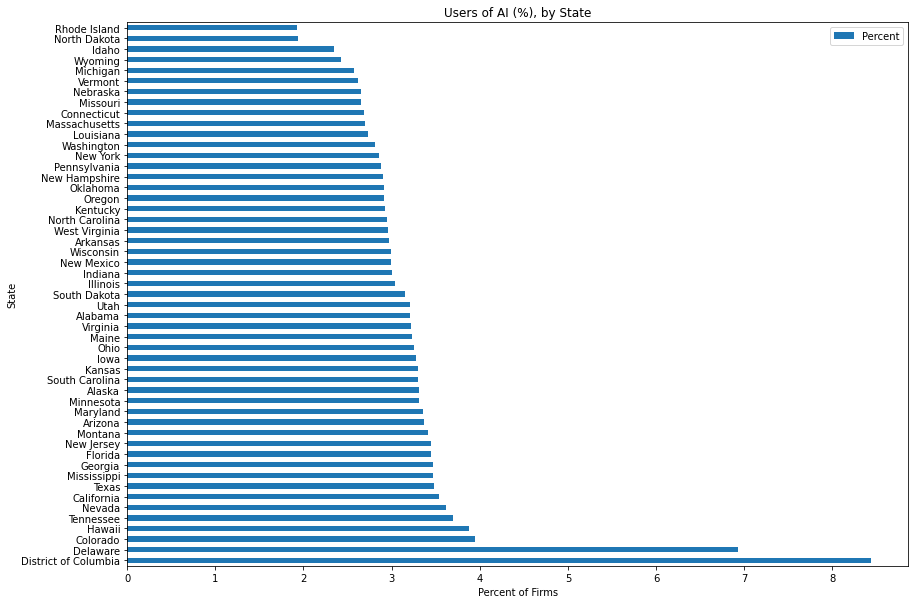

In [106]:
plt.rcParams["figure.figsize"]=[14,10]

ax = use_ai.plot(title = 'Users of AI (%), by State', kind='barh',x='NAME',y='Percent')
ax.set_xlabel('Percent of Firms')
ax.set_ylabel('State')

Most: DC, Delaware, Colorado.

Least: Rhode Island, North Dakota, Idaho

### Which states utilize AI the most? The Least? (by Number of Firms)

Text(0, 0.5, 'State')

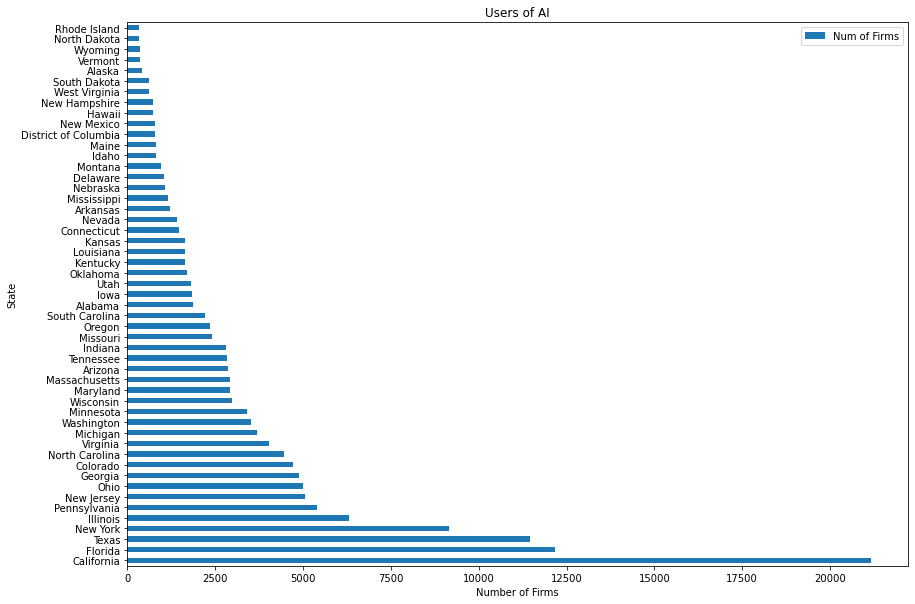

In [107]:
ax = use_ai.sort_values('Num of Firms',ascending=False).plot(title = 'Users of AI', kind='barh',x='NAME', y='Num of Firms')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('State')

### Not surprisingly, this follows population count. Showing that adjusting for population by ploting percentages is important

Most: CA, FL, TX

Least: RI, ND, WY

### Distribution of AI usage by state via Histogram

<AxesSubplot:xlabel='Num of Firms', ylabel='Count'>

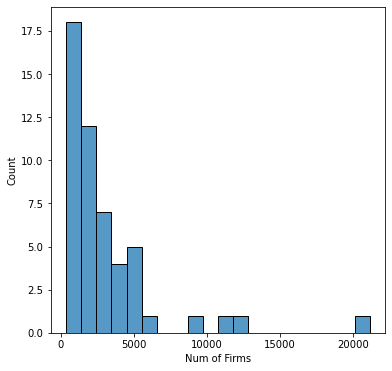

In [108]:
plt.rcParams["figure.figsize"]=[6,6]

sns.histplot(use_ai['Num of Firms'],bins = 20)

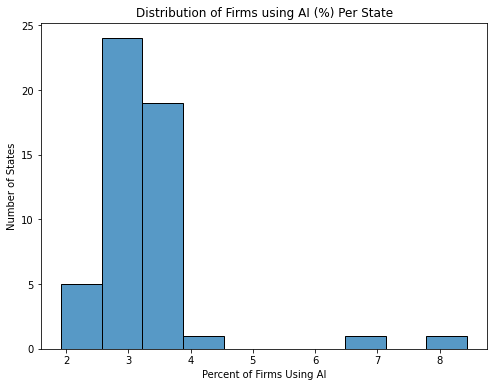

In [109]:
plt.rcParams["figure.figsize"]=[8,6]
hist = sns.histplot(use_ai['Percent'], bins = 10)
hist.set(xlabel='Percent of Firms Using AI', ylabel='Number of States', title='Distribution of Firms using AI (%) Per State')
plt.show()

### Which states utilize Robotics the most? The Least? (%)

Text(0, 0.5, 'State')

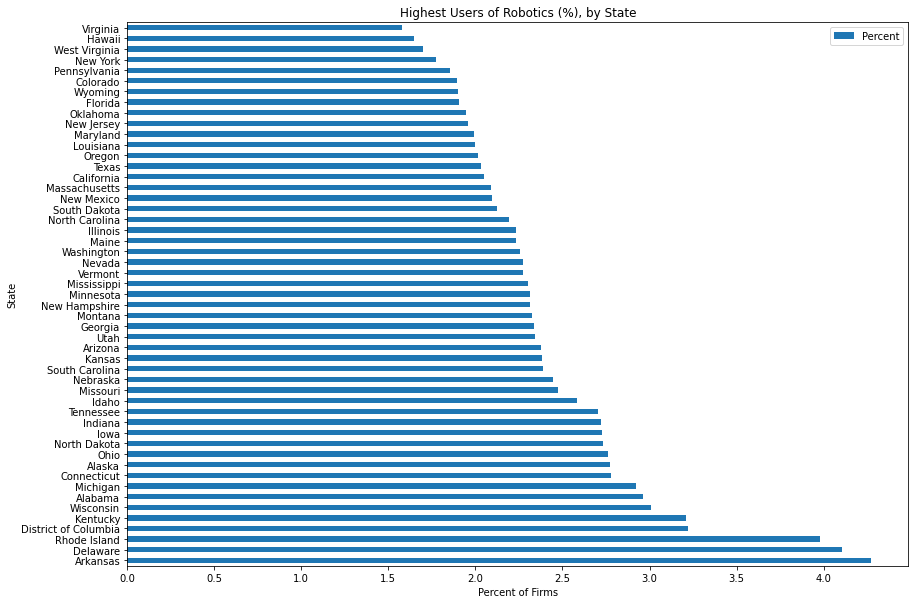

In [110]:
plt.rcParams["figure.figsize"]=[14, 10]

ax = use_rob.plot(title = 'Highest Users of Robotics (%), by State', kind='barh',x='NAME',y='Percent')
ax.set_xlabel('Percent of Firms')
ax.set_ylabel('State')

Most: AR, DE, RI
    
Least: VA, HI, WV

Interestingly, no apparent correlation with AI usage (See RI)

Text(0, 0.5, 'State')

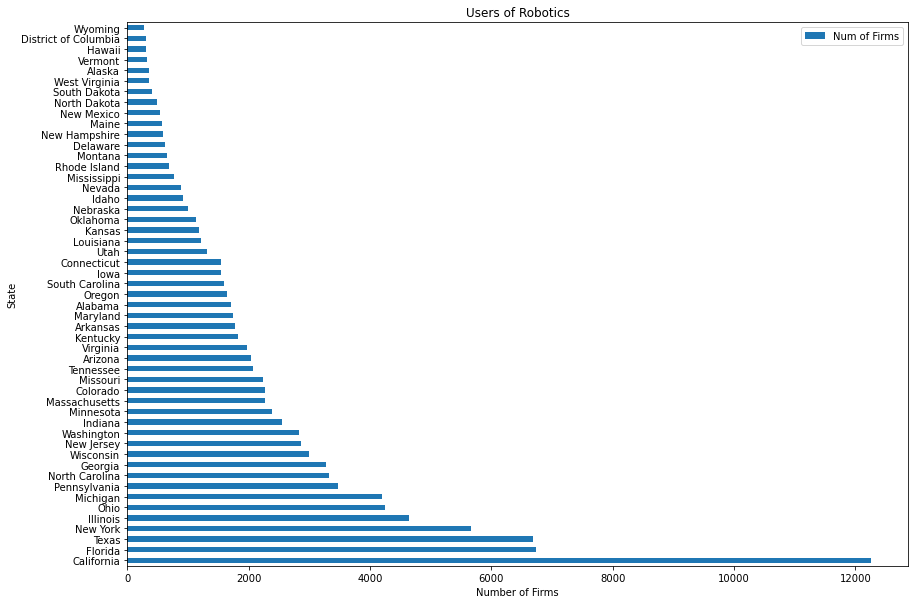

In [111]:
ax = use_rob.sort_values('Num of Firms',ascending=False).plot(title = 'Users of Robotics', kind='barh',x='NAME', y='Num of Firms')
ax.set_xlabel('Number of Firms')
ax.set_ylabel('State')

Again, follows population count when looking at raw number of firms

<AxesSubplot:xlabel='Num of Firms', ylabel='Count'>

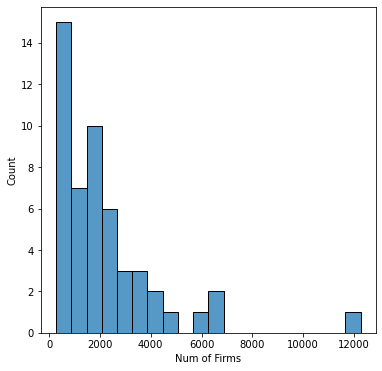

In [112]:
plt.rcParams["figure.figsize"]=[6,6]

sns.histplot(use_rob['Num of Firms'],bins = 20)

<AxesSubplot:xlabel='Percent', ylabel='Count'>

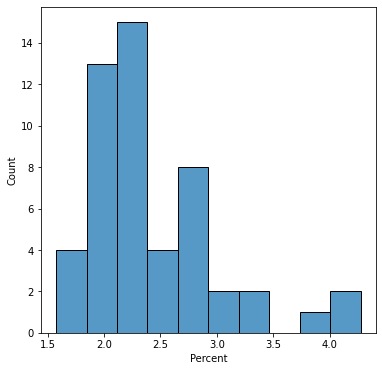

In [113]:
sns.histplot(use_rob['Percent'], bins = 10)

### Is there a relationship between AI usage and Robotics Usage?

In the previous bar graphs, the answer seems to be "No" (See RI). We can quantify this more clearly with a scatterplot. First, the "use_ai" and "use_rob" DataFrames are merged, so "xy" coordinates can are available

In [132]:
scatter_merge = use_ai[['NAME','Num of Firms','Percent']].merge(use_rob[['NAME','Num of Firms','Percent']], how='inner', on='NAME')
scatter_merge = scatter_merge.rename(columns={'Num of Firms_x':'Num AI','Num of Firms_y':'Num ROB','Percent_x':'Percent AI','Percent_y':'Percent ROB'})
scatter_merge

,NAME,Num AI,Percent AI,Num ROB,Percent ROB
0,District of Columbia,802,8.441217,306,3.220714
1,Delaware,1047,6.931939,620,4.104873
2,Colorado,4718,3.940796,2270,1.896059
3,Hawaii,741,3.878769,315,1.648869
4,Tennessee,2835,3.696219,2073,2.702738
5,Nevada,1417,3.618765,890,2.272901
6,California,21167,3.542529,12261,2.052012
7,Texas,11447,3.482539,6680,2.032267
8,Mississippi,1159,3.473700,768,2.301813
9,Georgia,4883,3.472751,3284,2.335555


[Text(0.5, 0, 'Number of Firms using AI'),
 Text(0, 0.5, 'Number of Firms using Robotics'),
 Text(0.5, 1.0, 'State AI use vs Robotics Use')]

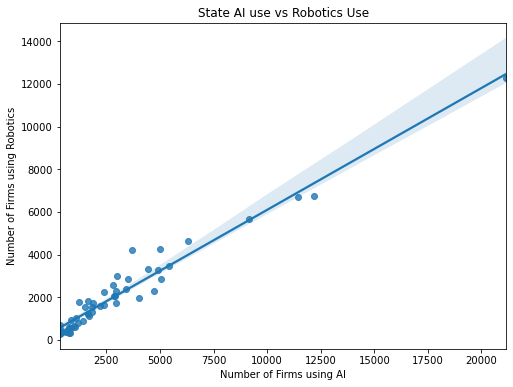

In [133]:
plt.rcParams["figure.figsize"]=[8,6]

scatplot = sns.regplot(data=scatter_merge, x="Num AI", y="Num ROB")
scatplot.set(xlabel='Number of Firms using AI', ylabel='Number of Firms using Robotics', title='State AI use vs Robotics Use')

#### There appears to be a relationship when plotting the number of firms, but this is explained by population size! Larger states will have larger number of both AI and robotic firms

[Text(0.5, 0, 'Percent of Firms using AI'),
 Text(0, 0.5, 'Percent of Firms using Robotics'),
 Text(0.5, 1.0, 'State AI Use (%) vs State Robotics Use (%)')]

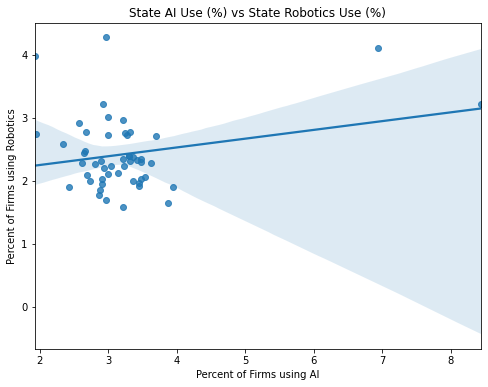

In [134]:
plt.rcParams["figure.figsize"]=[8,6]
scatplot = sns.regplot(data=scatter_merge, x="Percent AI", y="Percent ROB")
scatplot.set(xlabel='Percent of Firms using AI', ylabel='Percent of Firms using Robotics', title='State AI Use (%) vs State Robotics Use (%)')

#### Plotting the population-controlled data shows no relationship between AI-use and Robotics-use